In [2]:
import torch
from PIL import Image
import requests
from lavis.models import load_model_and_preprocess

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
/mnt/nas2/GrimaRepo/fpcattan/blip2/LAVIS_nav/lavis


In [3]:
if torch.cuda.is_available():
    device_count = torch.cuda.device_count()
    print(f"Number of available GPUs: {device_count}")
    for i in range(device_count):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
else:
    print("No GPUs available. Running on CPU.")

    # setup device to use
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"

Number of available GPUs: 1
GPU 0: NVIDIA TITAN RTX


In [3]:
from lavis.models import model_zoo
print(model_zoo)

Architectures                  Types
albef_classification           ve
albef_feature_extractor        base
albef_nlvr                     nlvr
albef_pretrain                 base
albef_retrieval                coco, flickr
albef_vqa                      vqav2
alpro_qa                       msrvtt, msvd
alpro_retrieval                msrvtt, didemo
blip_caption                   base_coco, large_coco
blip_classification            base
blip_feature_extractor         base
blip_image_text_matching       base, large
blip_nlvr                      nlvr
blip_pretrain                  base
blip_retrieval                 coco, flickr
blip_vqa                       vqav2, okvqa, aokvqa
blip2_opt                      pretrain_opt2.7b, pretrain_opt6.7b, caption_coco_opt2.7b, caption_coco_opt6.7b
blip2_t5                       pretrain_flant5xl, pretrain_flant5xl_vitL, pretrain_flant5xxl, caption_coco_flant5xl
blip2_feature_extractor        pretrain, pretrain_vitL, coco
blip2                      

#### Load pretrained/finetuned BLIP2 captioning model

In [3]:
# we associate a model with its preprocessors to make it easier for inference.
torch.torch.set_default_dtype(torch.float16)
model, vis_processors, _ = load_model_and_preprocess(
    name="blip2_opt", model_type="pretrain_opt6.7b", is_eval=True, device=device
)

'''
model, vis_processors, _ = load_model_and_preprocess(
    name="blip2_t5_instruct", model_type="flant5xl", is_eval=True, device=device
)

model, vis_processors, _ = load_model_and_preprocess(
    name="blip2_t5", model_type="pretrain_flant5xl", is_eval=True, device=device
)
model = model.half()
'''

vis_processors.keys()

INFO - 2024-06-13 20:58:23,749 - blip2_opt - freeze vision encoder


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

INFO - 2024-06-13 21:00:27,642 - base_model - load from pretrained
INFO - 2024-06-13 21:00:27,990 - blip2 - load checkpoint from /mnt/nas2/GrimaRepo/fpcattan/blip2/models/blip2_pretrained_opt6.7b.pth
INFO - 2024-06-13 21:00:28,008 - base_model - loaded from pretrained


dict_keys(['train', 'eval'])

# IALAB 1 - pretrained 6.7b OPT

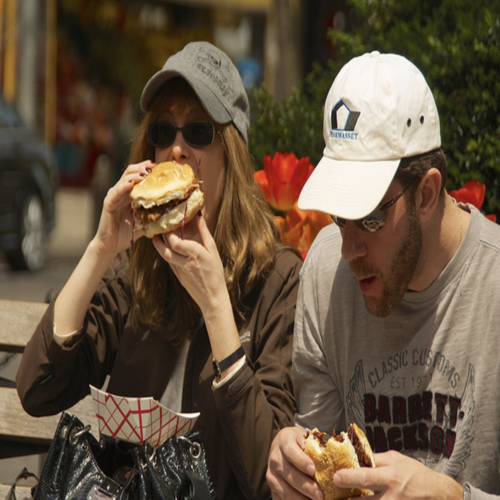

In [36]:
image = Image.open('/home/fpcattan/nas2_grima/datasets/cococap.jpeg' )
display(image.resize((500, 500)))
image = vis_processors["eval"](image).unsqueeze(0).to(device)

In [24]:
model.generate({"image": image})

['a man and a woman sitting on a bench eating hamburgers']

In [37]:
model.generate({
    "image": image,
    "prompt": "Question: Which are all the items in the image? Answer:"},num_captions=3)

['The man is eating a hamburger, the woman is eating a sandwich, the man is wearing a hat, the woman is wearing a hat,',
 'The man is eating a hamburger, the woman is eating a sandwich, the man is wearing a baseball cap, the woman is wearing sunglasses,',
 'The man is eating a hamburger, the woman is eating a sandwich, the man is wearing a hat, the woman is wearing sunglasses, the']

In [38]:
model.generate({
    "image": image,
    "prompt": "Question: Describe the image Answer:"},num_captions=3)

['A man and a woman are sitting on a bench eating hamburgers',
 'A man and a woman are eating hamburgers on a bench',
 'A man and a woman are eating hamburgers on a park bench']

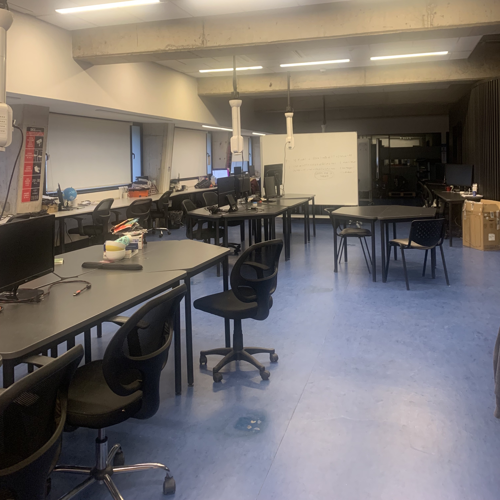

In [28]:
image = Image.open('/home/fpcattan/nas2_grima/datasets/ialab.jpg' )
display(image.resize((500, 500)))
image = vis_processors["eval"](image).unsqueeze(0).to(device)

In [29]:
model.generate({"image": image})

['an empty classroom with desks and chairs on the floor']

In [30]:
# due to the non-determinstic nature of necleus sampling, you may get different captions.
model.generate({"image": image}, use_nucleus_sampling=True, num_captions=3)

['a classroom with desks and chairs on a blue floor',
 'a classroom with desks, chairs and computers',
 'a classroom with desks, chairs, and computers']

In [31]:
model.generate({
    "image": image,
    "prompt": "Describe the layout of this room to me."},use_nucleus_sampling=True,num_captions=3)

['', '', '']

In [32]:
model.generate({
    "image": image,
    "prompt": "Describe where I can go in this room."},use_nucleus_sampling=True,num_captions=3)

['', '', '']

In [33]:
model.generate({"image": image, "prompt": "Question: Where can I exit this room? Answer: "},num_captions=3)

['ikea ikea ikea ikea ikea ikea ikea ikea ikea ikea',
 'ikea ikea ikea ikea ikea ikea ikea ikea ikea',
 'สวัสดี สวัสดี ส�']

In [44]:
model.generate({"image": image, "prompt": "Question: How can I leave this room? Answer:"},num_captions=3)

["You can't", "you can't", "I don't know, but I'm going to find out"]

In [34]:
model.generate({
    "image": image,
    "prompt": "Question: Which are all the items in the room? Answer:"},num_captions=3)

['desks, tables, chairs, blackboard, projector, whiteboard, whiteboard marker, whiteboard eraser, whiteboard eraser holder,',
 'desks, tables, chairs, blackboard, projector, whiteboard, whiteboard marker, whiteboard eraser, whiteboard pencil, whiteboard',
 'desks, tables, chairs, blackboard, projector, whiteboard, whiteboard marker, whiteboard eraser, blackboard eraser, black']

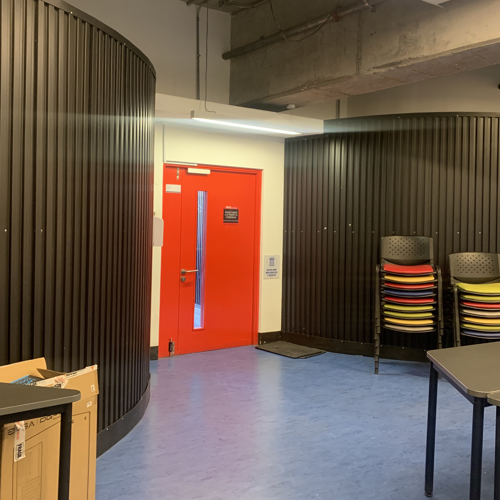

In [40]:
image = Image.open('/home/fpcattan/nas2_grima/datasets/ialab2.jpg' )
display(image.resize((500, 500)))
image = vis_processors["eval"](image).unsqueeze(0).to(device)

In [41]:
model.generate({"image": image})

['a room with black walls and a red door']

In [45]:
model.generate({
    "image": image,
    "prompt": "Question: Describe the layout of the room Answer:"},use_nucleus_sampling=True,num_captions=3)

['the room is a large open space with two large curved walls and a red door at the end of the room',
 'the room is a large open space with two large curved walls and a door at the end of the room',
 'the room is a large open space with two large curved walls and a door in the middle']

In [46]:
model.generate({
    "image": image,
    "prompt": "Question: Which are all the items in the room? Answer:"},use_nucleus_sampling=True,num_captions=3)

['The items in the room are chairs, a table, a red door, and a black wall',
 'The items in the room are chairs, a table, and a door',
 'The items in the room are chairs, a table, a red door, and a black curtain']

# IALAB 1 - RXR finetuned pretrained 6.7b OPT

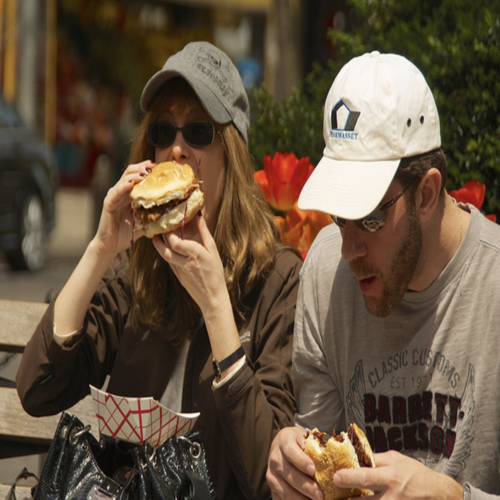

In [26]:
image = Image.open('/home/fpcattan/nas2_grima/datasets/cococap.jpeg' )
display(image.resize((500, 500)))
image = avis_processors["eval"](image).unsqueeze(0).to(device)

In [32]:
model.generate({"image": image})

['you are facing towards a bench, slightly turn to your right and move forward, you can see a table in front of you,']

In [33]:
model.generate({
    "image": image,
    "prompt": "Describe this image"},use_nucleus_sampling=True,num_captions=3)

['to us, what do you see in front of you?',
 "to us, we want to know where you are standing and what you're looking at and what you're going to do next",
 "to us, we want to know where you are standing and what you're looking at in front of you"]

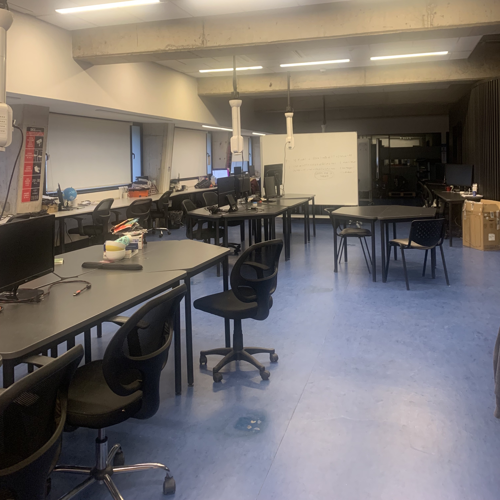

In [22]:
image = Image.open('/home/fpcattan/nas2_grima/datasets/ialab.jpg' )
display(image.resize((500, 500)))
image = vis_processors["eval"](image).unsqueeze(0).to(device)

In [21]:
model.generate({"image": image})

['you are facing towards the wall, turn around and move forward towards the black chair, which is in front of you now you are facing towards the']

In [10]:
model.generate({"image": image}, use_nucleus_sampling=True, num_captions=3)

['you are facing towards the wall, turn right and move forward, now you are facing towards the black chair, which is in front of you,',
 'you are facing towards the wall, turn right and move forward, you are now facing towards the black chair, that would be your end point',
 'you are facing towards the wall, turn right and move forward, now you are facing towards the black chair, which is in front of you']

In [7]:
model.generate({
    "image": image,
    "prompt": "Describe the layout of the room"},use_nucleus_sampling=True,num_captions=3)

['you are in, you are facing towards the wall, turn to your right and walk towards the black chair in front of you,',
 'you are in, you are facing towards the wall, turn to your left and move forward, you are now facing towards the black chair, which',
 'you are in, you are facing towards the wall, turn to your right and walk towards the black chair in front of you']

In [24]:
model.generate({
    "image": image,
    "prompt": "Question: Which are all the items in the room? Answer:"},num_captions=3)

['All of the items in the room are on the left side of the room, and there is a black chair on the right side of the room',
 'All the items in the room are on the left side of the room, you can see a black chair on the left side of the room,',
 'All the items in the room are on the left side of the room, you can see a black chair on the left side of the room and']

In [9]:
model.generate({"image": image, "prompt": "Question: Can I leave this room? Answer: "},num_captions=3)

['????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????',
 '????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????',
 '?????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????']

# IALAB 2

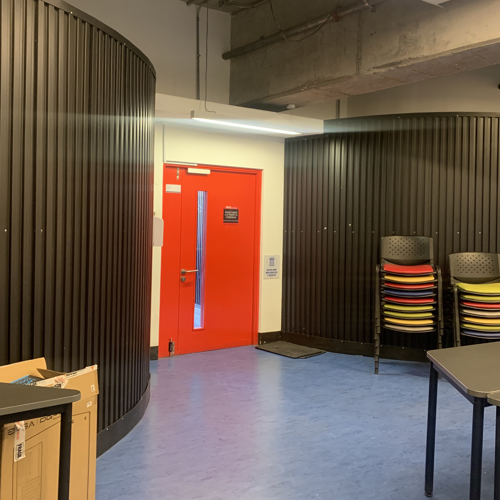

In [39]:
image = Image.open('/home/fpcattan/nas2_grima/datasets/ialab2.jpg' )
display(image.resize((500, 500)))
image = vis_processors["eval"](image).unsqueeze(0).to(device)

In [12]:
model.generate({"image": image})

['now you are facing towards the wall, slightly turn left and move forward, now you are facing towards the wall, slightly turn left and move forward']

In [13]:
model.generate({"image": image}, use_nucleus_sampling=True, num_captions=3)

['you are facing towards the wall, turn around and move towards the table which is in front of you now you are in front of the table,',
 'you are facing towards the wall, turn around and move towards the table which is in front of you, now you are facing towards the wall,',
 'you are facing towards the wall, turn around and move towards the table which is in front of you now you are facing towards the table, which']

In [17]:
model.generate({
    "image": image,
    "prompt": "Describe the layout of the room"},use_nucleus_sampling=True,num_captions=3)

['and what you see in front of you once you are standing in the middle of the room, you will see a table in front of you and',
 'and what you see in front of you once you are standing in the middle of the room, you will see a table in front of you with',
 'and what you see in front of you once you are standing in the middle of the room, you will see a table in front of you,']

In [21]:
model.generate({
    "image": image,
    "prompt": "Question: Which are all the items in the room? Answer:"},num_captions=3)

['All of the items in the room are on the left side of the room, and there is a black chair on the right side of the room',
 'All of the items in the room are on the left side of the room, and there is a black chair on the left side of the room',
 'All of the items in the room are on the left side of the room']

In [28]:
model.generate({
    "image": image,
    "prompt": "Question: Imagine you are giving instructions to a robot, tell it how to exit this room."},use_nucleus_sampling=True,num_captions=3, min_length = 30)

['Now, you are standing in the middle of a room with a red table and chairs, you are facing the red table and chairs, turn around',
 'Now, you are standing in the middle of a room with a red table and chairs, you are facing the red table and chairs, you are',
 'Now, you are standing in the middle of a room with a red table and chairs, you are facing the red table and chairs, and you']

In [31]:
model.generate({"image": image, "prompt": "Question: What can I do in this room? Answer: "},num_captions=3)

['Â You can do whatever you want to do in this room, you can sit on the chairs, you can stand in the middle of the room',
 'Â You can do whatever you want to do in this room, you can sit on the chairs, you can stand on the table, you can',
 'Â You can do whatever you want to do in this room, you can sit on the chairs, you can stand in front of the table,']

In [29]:
model.generate({
    "image": image,
    "prompt": "Describe the layout of the room"},use_nucleus_sampling=True,num_captions=3)

["you're standing in front of, and tell us where you're going to start, and where you're going to end",
 "you're standing in front of, and tell us where you're going to start, and where you're going to end you're going to start",
 "you're standing in front of, and tell us where you're going to start, and where you're going to stop"]

In [33]:
model.generate({"image": image, "prompt": "Question: Can I leave this room? Answer: "},num_captions=3)

['????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????',
 '????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????',
 '?????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????']

In [34]:
model.generate({"image": image, "prompt": "Question: How can I leave this room? Answer: "},num_captions=3)

['urn you can leave this room through the open door in front of you now you are standing in front of the open door, which is your destination',
 'urn you can leave this room through the open door in front of you now you are standing in front of the open door in front of you and',
 'urn you can leave this room through the open door in front of you now you are standing in front of the open door in front of you,']

In [35]:
context = [
    ("Is there a door in the room?", "yes"),
    ("Can I use it to leave this room?", "yes")]
question = "Can I leave this room?"
template = "Question: {} Answer: {}."

prompt = " ".join([template.format(context[i][0], context[i][1]) for i in range(len(context))]) + " Question: " + question + " Answer:"

print(prompt)

Question: Is there a door in the room? Answer: yes. Question: Can I use it to leave this room? Answer: yes. Question: Can I leave this room? Answer:


In [36]:
model.generate(
    {
    "image": image,
    "prompt": prompt
    },
    use_nucleus_sampling=False,
)

['Can I use it to enter this room? Answer: yes. Question: Can I use it to exit this room? Answer: yes. Question']

# pipeline normal

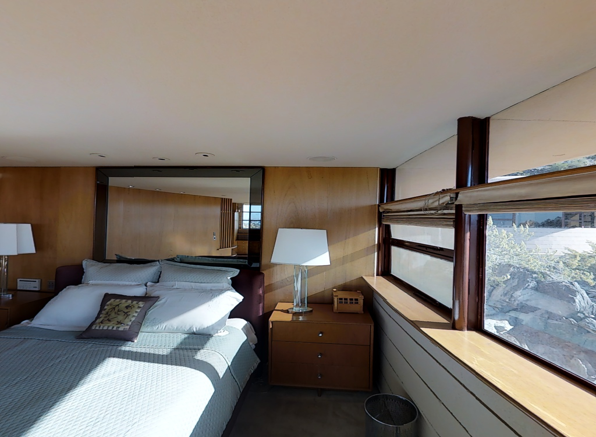

In [ ]:
image = Image.open('./prueba2.jpg' )
display(image.resize((596, 437)))

#### prepare the image as model input using the associated processors

In [ ]:
image = vis_processors["eval"](image).unsqueeze(0).to(device)

#### generate caption using beam search

In [ ]:
model.generate({"image": image})

['a bedroom with a bed, a nightstand, and a window']

#### generate multiple captions using nucleus sampling

In [ ]:
# due to the non-determinstic nature of necleus sampling, you may get different captions.
model.generate({"image": image}, use_nucleus_sampling=True, num_captions=3)

['the bedroom is nicely furnished',
 'a bed with two bedside tables and two lamps and a window',
 'a bedroom with a bed, nightstand and window that looks out to the ocean']

#### instructed zero-shot vision-to-language generation

In [ ]:
model.generate({"image": image, "prompt": "Question: What is on top of the nightstand? Answer:"},num_captions=3)

['A bed', 'A lamp', 'A nightstand']

In [ ]:
model.generate({
    "image": image,
    "prompt": "Question: Which are all the items in the room? Answer:"},num_captions=3)

['The bed', 'All of them', 'The bed, the nightstand, and the window']

In [ ]:
descr = model.generate({"image": image})
context = [('Describe the room', descr)]
question = "How can I leave this room?"
template = "Question: {} Answer: {}."

prompt = " ".join([template.format(context[i][0], context[i][1]) for i in range(len(context))]) + " Question: " + question + " Answer:"

print(prompt)

Question: Describe the room Answer: ['a bedroom with a bed, a nightstand, and a window']. Question: How can I leave this room? Answer:


In [ ]:
context = [
    ("which city is this?", "singapore"),
    ("why?", "it has a statue of a merlion"),
]
question = "where is the name merlion coming from?"
template = "Question: {} Answer: {}."

prompt = " ".join([template.format(context[i][0], context[i][1]) for i in range(len(context))]) + " Question: " + question + " Answer:"

print(prompt)

Question: which city is this? Answer: singapore. Question: why? Answer: it has a statue of a merlion. Question: where is the name merlion coming from? Answer:


# IALAB 1 - BLIP T5xl

In [4]:
# we associate a model with its preprocessors to make it easier for inference.
torch.torch.set_default_dtype(torch.float16)
model, vis_processors, _ = load_model_and_preprocess(
    name="blip2_t5_instruct", model_type="flant5xl", is_eval=True, device=device
)

'''
model, vis_processors, _ = load_model_and_preprocess(
    name="blip2_t5", model_type="pretrain_flant5xl", is_eval=True, device=device
)
'''

model = model.float()

vis_processors.keys()

INFO - 2024-06-13 22:00:42,596 - blip2_t5_instruct - freeze vision encoder


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

INFO - 2024-06-13 22:01:43,492 - base_model - load from pretrained
INFO - 2024-06-13 22:01:44,888 - blip2 - load checkpoint from /mnt/nas2/GrimaRepo/fpcattan/blip2/models/instruct_blip_flanxl_trimmed.pth
INFO - 2024-06-13 22:01:44,963 - base_model - loaded from pretrained


dict_keys(['train', 'eval'])

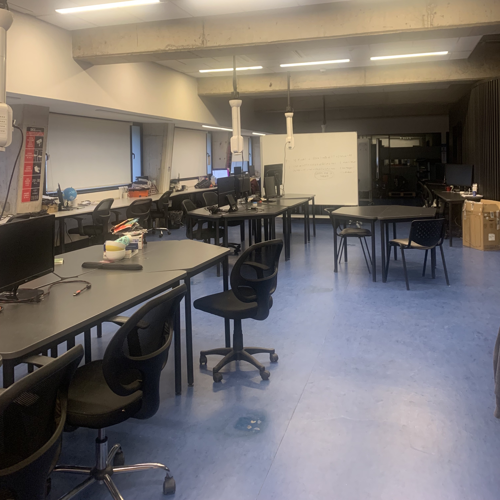

In [18]:
image = Image.open('/home/fpcattan/nas2_grima/datasets/ialab.jpg' )
display(image.resize((500, 500)))
image = vis_processors["eval"](image).unsqueeze(0).to(device)

In [7]:
model.generate({"image": image})

['a room full of desks and chairs with a white board']

In [21]:
model.generate({
    "image": image,
    "prompt": "Question: How can I leave this room? Answer:"},use_nucleus_sampling=True,num_captions=3)

['open door', 'open door', 'exit']

In [8]:
model.generate({
    "image": image,
    "prompt": "Describe the layout of the room"},use_nucleus_sampling=True,num_captions=3)

['The image features a large, open space with a number of tables and chairs scattered throughout the room. There is a whiteboard in the middle of the room, which can be used to display information on a projector or screen. There is also a laptop computer on one of the tables, which can be used to connect to the internet.',
 'The image features a large, open space with a number of tables and chairs scattered throughout the room. There is a whiteboard in the middle of the room, which can be used to display information on a projector or screen. There is also a laptop computer on one of the tables, which can be used to connect to the internet. A chair is placed at the corner of the room, which can be used to sit down and work on a project. There is also a bottle of water located in the corner of the room, which can be used to refill a drink.',
 'The image features a large, open space with a number of tables and chairs scattered throughout the room. There is a whiteboard in the middle of th

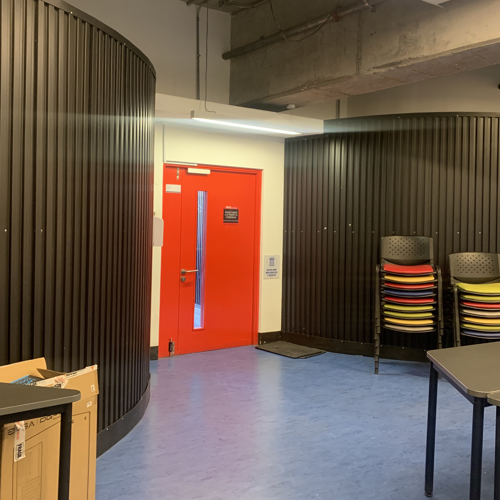

In [22]:
image = Image.open('/home/fpcattan/nas2_grima/datasets/ialab2.jpg' )
display(image.resize((500, 500)))
image = vis_processors["eval"](image).unsqueeze(0).to(device)

In [10]:
model.generate({"image": image})

['a room with chairs and a red door']

In [11]:
model.generate({"image": image}, use_nucleus_sampling=True, num_captions=3)

['a room with a red door and chairs',
 'a room with a red door and chairs',
 'a room with a red door and chairs in it']

In [12]:
model.generate({
    "image": image,
    "prompt": "Describe the layout of the room"},use_nucleus_sampling=True,num_captions=3)

['The image features a circular room with a red door in the center. There are several chairs scattered around the room, some of which are positioned closer to the door. There is also a small table located near the door, which can be used as a workspace or storage area.',
 'The image features a circular room with a red door in the center. There are several chairs scattered around the room, some of which are positioned closer to the door. There is also a small table located near the door, which can be used as a workspace or storage area. There is also a box placed close to the door, which can be used to store documents or other items.',
 'The image features a circular room with a red door in the center. There are several chairs scattered around the room, some of which are positioned closer to the door. There is also a small table located near the door, which can be used as a workspace or storage area. There is also a box placed close to the door, which can be used to store various items.

In [23]:
model.generate({
    "image": image,
    "prompt": "Question: How can I leave this room? Answer:"},use_nucleus_sampling=True,num_captions=3)

['door', 'door', 'door']

In [13]:
model.generate({
    "image": image,
    "prompt": "Question: Which are all the items in the room? Answer:"},use_nucleus_sampling=True,num_captions=3)

['chairs', 'chairs', 'chairs']

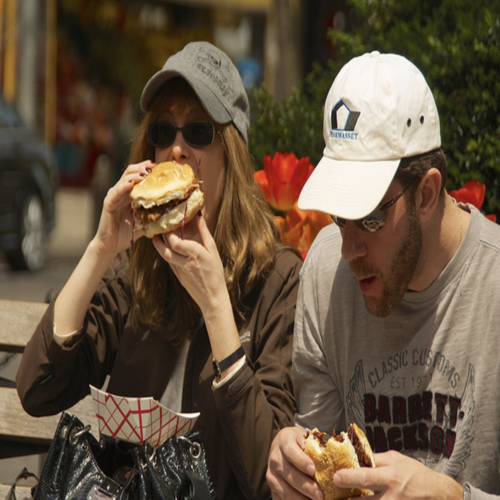

In [14]:
image = Image.open('/home/fpcattan/nas2_grima/datasets/cococap.jpeg' )
display(image.resize((500, 500)))
image = vis_processors["eval"](image).unsqueeze(0).to(device)

In [13]:
model.generate({"image": image})

['a man and woman eating a sandwich']

In [15]:
model.generate({"image": image}, use_nucleus_sampling=True, num_captions=3)

['a man and woman sitting on a bench eating a sandwich',
 'a man and woman eating a sandwich on a bench',
 'a man and woman eating a sandwich on a bench']

In [17]:
model.generate({
    "image": image,
    "prompt": "Describe this image"},use_nucleus_sampling=True,num_captions=3)

['The image features a man and a woman sitting on a bench while eating a sandwich. The man is wearing a hat and the woman is wearing a hat, both of which are visible in the image. The man is holding a sandwich while the woman is eating a sandwich. There are several bags scattered around the scene, some of which are placed closer to the man.',
 'The image features a man and a woman sitting on a bench while eating a sandwich. The man is wearing a hat and the woman is wearing a hat, both of which are visible in the image. The man is holding a sandwich while the woman is eating a sandwich. There are several bags scattered around the scene, some of which are close to the man and woman.',
 'The image features a man and a woman sitting on a bench while eating a sandwich. The man is wearing a hat and the woman is wearing a hat, both of which are visible in the image. The man is holding a sandwich while the woman is eating a sandwich. There are several bags scattered around the scene, including